In [4]:
import cv2
import numpy as np




In [89]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('secondCat.png', cv2.IMREAD_GRAYSCALE)

# Convert to binary (values must be 0 or 1 for skeletonize)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
binary = binary // 255  # Convert to 0 and 1
binary = 1-binary

# Apply skeletonization
skeleton = skeletonize(binary)

# Convert back to 0–255 for display or saving
skeleton_img = (skeleton * 255).astype(np.uint8)

# Show with OpenCV
cv2.imshow("Skeleton", skeleton_img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [236]:
from scipy.ndimage import convolve
from skimage.morphology import skeletonize
import numpy as np
from skimage.draw import disk
from scipy.ndimage import convolve

import cv2

# Neighborhood kernel (8-connectivity)
kernel = np.array([[1,1,1],
                   [1,1,1],  # Center is weighted more to keep identity
                   [1,1,1]])


# kernel for dilation/Erosion
l=9
kernel_circle = np.zeros((l, l), dtype=np.uint8)
rr, cc = disk((l//2, l//2), l//2, shape=kernel_circle.shape)
kernel_circle[rr, cc] = 1


kernel_cross = np.zeros((15, 15), dtype=np.uint8)
center = 7
kernel_cross[:, center] = 1
kernel_cross[center, :] = 1

kernel_diag = np.zeros((15, 15), dtype=np.uint8)
for i in range(15):
    kernel_diag[i, i] = 1
    kernel_diag[i, 14 - i] = 1

# SMkeletonize (your part)
catName = "catWithHole"
# img = cv2.imread('secondCat.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('catWithHole.bmp', cv2.IMREAD_GRAYSCALE)
img = cv2.imread(catName + ".bmp", cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (l, l), 0)



_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
binary = cv2.erode(binary, kernel_circle, iterations=1)
binary = cv2.dilate(binary, kernel_circle, iterations=1)

binary = 255 - binary

skeleton = skeletonize(binary).astype(np.uint8)

# Count neighbors (excluding center)
# neighbor_count = convolve(skeleton, np.ones((3,3)), mode='constant') - skeleton
neighbor_count = convolve(skeleton, kernel, mode='constant') - skeleton



l=4
kernel_circle = np.zeros((l, l), dtype=np.uint8)
rr, cc = disk((l//2, l//2), l//2, shape=kernel_circle.shape)
kernel_circle[rr, cc] = 1

# Identify key points
endpoints = np.logical_and(skeleton, neighbor_count == 1)
junctions = np.logical_and(skeleton, neighbor_count >= 3)
junctions = cv2.dilate(junctions.astype(np.uint8), kernel_circle, iterations=1).astype(bool)
endpoints = cv2.dilate(endpoints.astype(np.uint8), kernel_circle, iterations=1).astype(bool)



display = np.stack([skeleton*255]*3, axis=-1)  # RGB image
display[endpoints] = [255, 0, 0]   # red = endpoints
display[junctions] = [0, 255, 0]   # green = junctions






#### Converting to graph
def get_neighbors(x, y, skel):
    neighbors = []
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            if dx == 0 and dy == 0:
                continue
            nx_, ny_ = x + dx, y + dy
            if 0 <= nx_ < skel.shape[0] and 0 <= ny_ < skel.shape[1]:
                if skel[nx_, ny_] == 1:
                    neighbors.append((nx_, ny_))
    return neighbors

# Convert endpoints and junctions to set of node positions
node_set = set(zip(*np.where(np.logical_or(endpoints, junctions))))

visited = set()
G = nx.Graph()

# Trace each branch starting from endpoints
for node in node_set:
    if node in visited:
        continue
    x, y = node
    visited.add((x, y))
    for neighbor in get_neighbors(x, y, skeleton):
        path = [node]
        curr = neighbor
        prev = node
        while curr not in node_set:
            path.append(curr)
            nexts = [n for n in get_neighbors(*curr, skeleton) if n != prev]
            if len(nexts) != 1:
                break  # dead-end or junction encountered
            prev, curr = curr, nexts[0]
        path.append(curr)
        G.add_edge(path[0], path[-1], pixels=path)




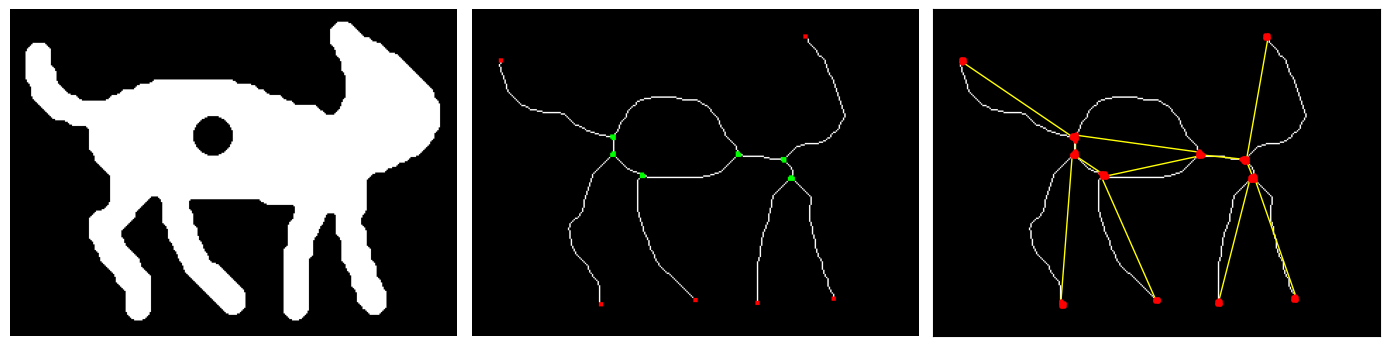

In [237]:

display = np.stack([skeleton*255]*3, axis=-1)  # RGB image
display[endpoints] = [255, 0, 0]   # red = endpoints
display[junctions] = [0, 255, 0]   # green = junctions

fig, ax = plt.subplots(1,3, figsize=(14,10))

ax[0].imshow(binary, cmap="gray")
ax[0].axis("off")

ax[1].imshow(display)
ax[1].axis("off")


ax[2].imshow(skeleton, cmap='gray')

# Draw graph nodes and edges
pos = {node: (node[1], node[0]) for node in G.nodes}  # swap (row, col) to (x, y)
nx.draw_networkx_nodes(G, pos, node_size=5, node_color='red')
# _=nx.draw_networkx_edges(G, pos, edge_color='blue', width=3,connectionstyle="arc3,rad=0.2", arrows=True, arrowsize=1, arrowstyle="-"
#                         ,min_source_margin=0,
#                         min_target_margin=0)
_=nx.draw_networkx_edges(G, pos, edge_color='yellow', width=1)

# plt.title("Graph over Skeleton (Red: Nodes, Blue: Edges)")
# plt.show()


plt.tight_layout()
plt.savefig(catName+".png", dpi=300)
# plt.show()


### 

In [196]:
import networkx as nx




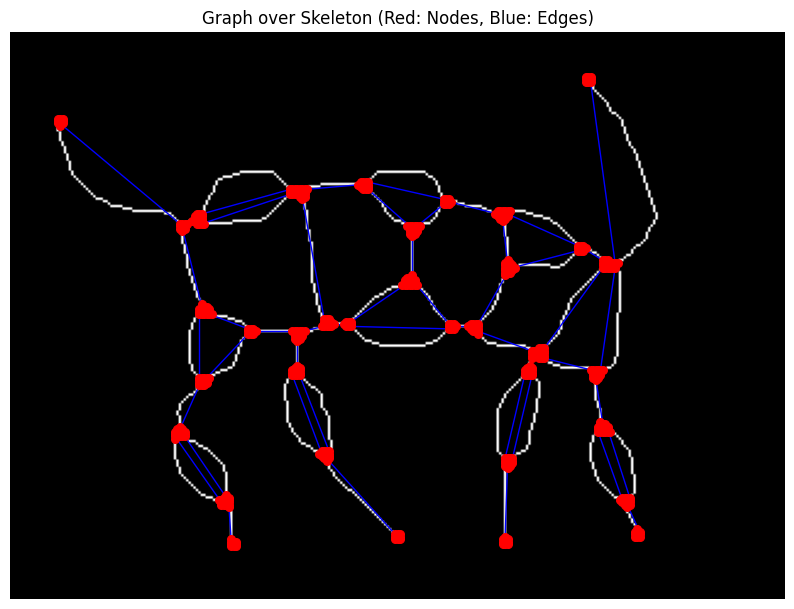

In [197]:
import matplotlib.pyplot as plt
import networkx as nx

# Plot the skeleton
plt.figure(figsize=(10, 10))



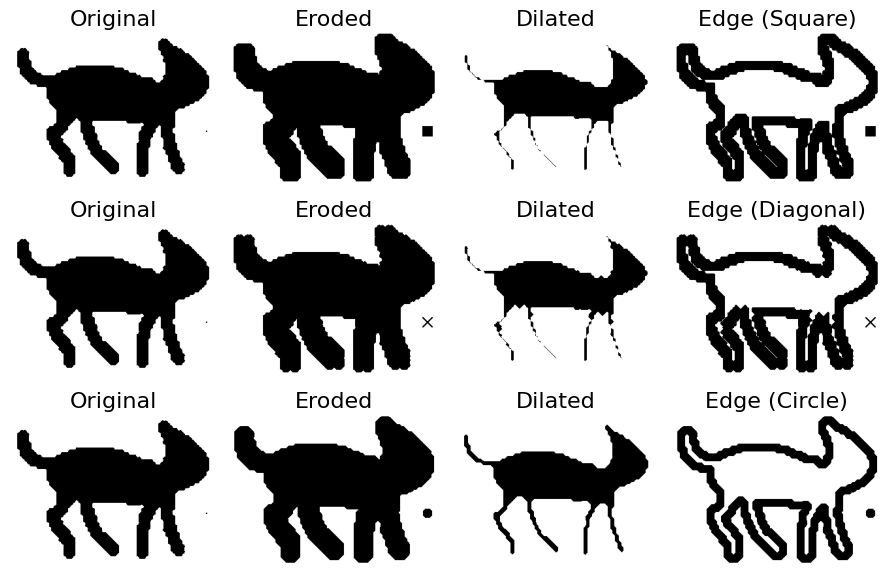

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

# Load binary image
img = cv2.imread('secondCat.png', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
binary[150:152,300:302] = 0

# Define kernels
kernel_square = np.ones((15, 15), dtype=np.uint8)

kernel_cross = np.zeros((15, 15), dtype=np.uint8)
center = 7
kernel_cross[:, center] = 1
kernel_cross[center, :] = 1

kernel_diag = np.zeros((15, 15), dtype=np.uint8)
for i in range(15):
    kernel_diag[i, i] = 1
    kernel_diag[i, 14 - i] = 1

kernel_circle = np.zeros((15, 15), dtype=np.uint8)
rr, cc = disk((7, 7), 7, shape=kernel_circle.shape)
kernel_circle[rr, cc] = 1

kernel_diamond = np.zeros((15, 15), dtype=np.uint8)
for i in range(15):
    for j in range(15):
        if abs(i - 7) + abs(j - 7) <= 7:
            kernel_diamond[i, j] = 1

kernel_ring = np.zeros((15, 15), dtype=np.uint8)
outer_rr, outer_cc = disk((7, 7), 7)
inner_rr, inner_cc = disk((7, 7), 3)
kernel_ring[outer_rr, outer_cc] = 1
kernel_ring[inner_rr, inner_cc] = 0

kernelList = [
    ('Square', kernel_square),
    # ('Cross', kernel_cross),
    ('Diagonal', kernel_diag),
    ('Circle', kernel_circle),
    # ('Diamond', kernel_diamond),
    # ('Ring', kernel_ring)
]

# Create full figure
fig, axes = plt.subplots(len(kernelList), 4, figsize=(9, 2 * len(kernelList)))

for i, (name, kernel) in enumerate(kernelList):
    eroded = cv2.erode(binary, kernel, iterations=1)
    dilated = cv2.dilate(binary, kernel, iterations=1)
    edge = 255 - (dilated * (255 - eroded))

    images = [binary, eroded, dilated, edge]
    titles = ['Original', 'Eroded', 'Dilated', f'Edge ({name})']

    for j in range(4):
        ax = axes[i, j]
        ax.imshow(images[j], cmap='gray')
        ax.set_title(titles[j], fontsize=16)
        ax.axis('off')

plt.tight_layout()
plt.savefig('all_kernels_results.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

# Load binary image
img_closing = cv2.imread('catForOpening.bmp', cv2.IMREAD_GRAYSCALE)
img_opening = cv2.imread('catForClosing.bmp', cv2.IMREAD_GRAYSCALE)
_, binary_closing = cv2.threshold(img_closing, 127, 255, cv2.THRESH_BINARY)
_, binary_opening = cv2.threshold(img_opening, 127, 255, cv2.THRESH_BINARY)

# binary[150:152,300:302] = 0



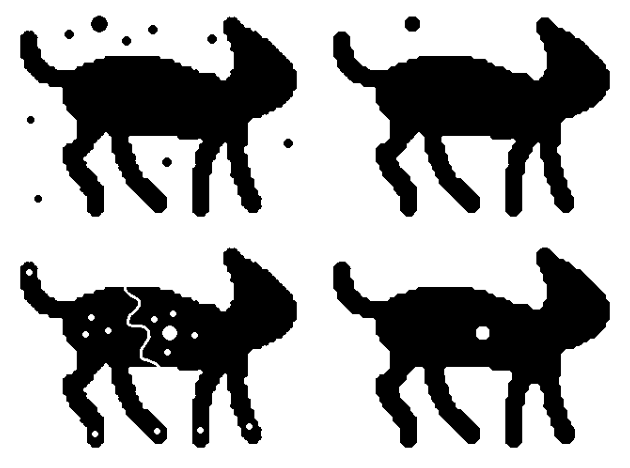

In [54]:



kernel = np.zeros((13, 13), dtype=np.uint8)
rr, cc = disk((6, 6), 6, shape=kernel.shape)
kernel[rr, cc] = 1



eroded = cv2.erode(binary_opening, kernel, iterations=1)
opening = cv2.dilate(eroded, kernel, iterations=1)


dilated = cv2.dilate(binary_closing, kernel, iterations=1)
closing = cv2.erode(dilated, kernel, iterations=1)


fig, ax = plt.subplots(2,2)

ax[0,0].imshow(binary_closing, cmap="gray")
ax[0,0].axis('off')
ax[0,1].imshow(closing, cmap="gray")
ax[0,1].axis('off')
ax[1,0].imshow(binary_opening, cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(opening, cmap="gray")
ax[1,1].axis('off')


plt.tight_layout()
fig.savefig("openingAndClosing.png", dpi=300)

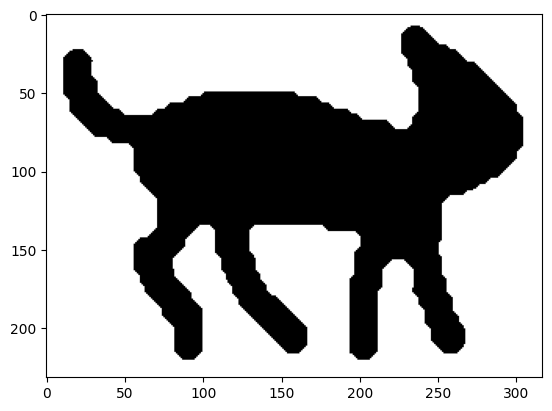

In [34]:
plt.imshow(opening, cmap="gray")